In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\91879\Downloads\data.csv") ### after balance 

df_0 = df[df["Fault"] == 0].sample(n=5000, random_state=42)
df_1 = df[df["Fault"] == 1].sample(n=5000, random_state=42)
df_balanced = pd.concat([df_0, df_1]).sample(frac=1, random_state=42).reset_index(drop=True)
print(df_balanced["Fault"].value_counts())
df_balanced.to_csv(r"C:\Users\91879\Downloads\balance data 10000.csv", index=False)


In [3]:
df["Fault"].value_counts()

Fault
0    53307
1    53307
Name: count, dtype: int64

In [4]:
df["Brake_Pressure"].agg(["max","min"])

max    144.790843
min     55.343961
Name: Brake_Pressure, dtype: float64

In [5]:
df.columns

Index(['Brake_Pressure', 'Pad_Wear_Level', 'ABS_Status', 'Wheel_Speed_FL',
       'Wheel_Speed_FR', 'Wheel_Speed_RL', 'Wheel_Speed_RR',
       'Fluid_Temperature', 'Pedal_Position', 'Fault'],
      dtype='object')

In [6]:
x=df.drop("Fault",axis=1)
y=df["Fault"]

In [7]:
x.isnull().sum()

Brake_Pressure       10618
Pad_Wear_Level       10538
ABS_Status           10681
Wheel_Speed_FL       10478
Wheel_Speed_FR       10541
Wheel_Speed_RL       10459
Wheel_Speed_RR       10880
Fluid_Temperature    10881
Pedal_Position       10835
dtype: int64

In [8]:
df

,Brake_Pressure,Pad_Wear_Level,ABS_Status,Wheel_Speed_FL,Wheel_Speed_FR,Wheel_Speed_RL,Wheel_Speed_RR,Fluid_Temperature,Pedal_Position,Fault
0,104.967142,0.658791,0.0,60.243966,64.073339,64.173293,52.779920,NaN,0.721824,0
1,98.617357,0.363352,0.0,50.805666,62.510148,57.761404,52.207206,90.971220,0.520359,0
2,106.476885,0.400152,0.0,54.526314,64.716102,60.688568,53.322908,89.698445,0.033706,1
3,115.230299,0.781691,1.0,61.330578,56.177756,58.223006,59.644416,95.134251,0.311474,0
4,97.658466,0.603683,0.0,NaN,NaN,56.646720,64.197682,94.734924,0.266101,0
...,...,...,...,...,...,...,...,...,...,...
106609,105.864408,0.561704,0.0,56.271673,52.991132,NaN,61.065818,99.490616,0.433210,1
106610,99.548771,0.535331,0.0,61.603382,65.437461,NaN,58.399323,NaN,NaN,1
106611,96.557698,0.447399,1.0,56.481920,61.562398,58.920309,61.263553,83.934699,0.964042,1
106612,87.050260,NaN,0.0,61.297360,62.239918,57.670108,NaN,NaN,0.817132,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106614 entries, 0 to 106613
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Brake_Pressure     95996 non-null   float64
 1   Pad_Wear_Level     96076 non-null   float64
 2   ABS_Status         95933 non-null   float64
 3   Wheel_Speed_FL     96136 non-null   float64
 4   Wheel_Speed_FR     96073 non-null   float64
 5   Wheel_Speed_RL     96155 non-null   float64
 6   Wheel_Speed_RR     95734 non-null   float64
 7   Fluid_Temperature  95733 non-null   float64
 8   Pedal_Position     95779 non-null   float64
 9   Fault              106614 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 8.1 MB


In [10]:
df.shape

(106614, 10)

In [11]:
df.isna().sum()

Brake_Pressure       10618
Pad_Wear_Level       10538
ABS_Status           10681
Wheel_Speed_FL       10478
Wheel_Speed_FR       10541
Wheel_Speed_RL       10459
Wheel_Speed_RR       10880
Fluid_Temperature    10881
Pedal_Position       10835
Fault                    0
dtype: int64

In [12]:
import missingno

<Axes: >

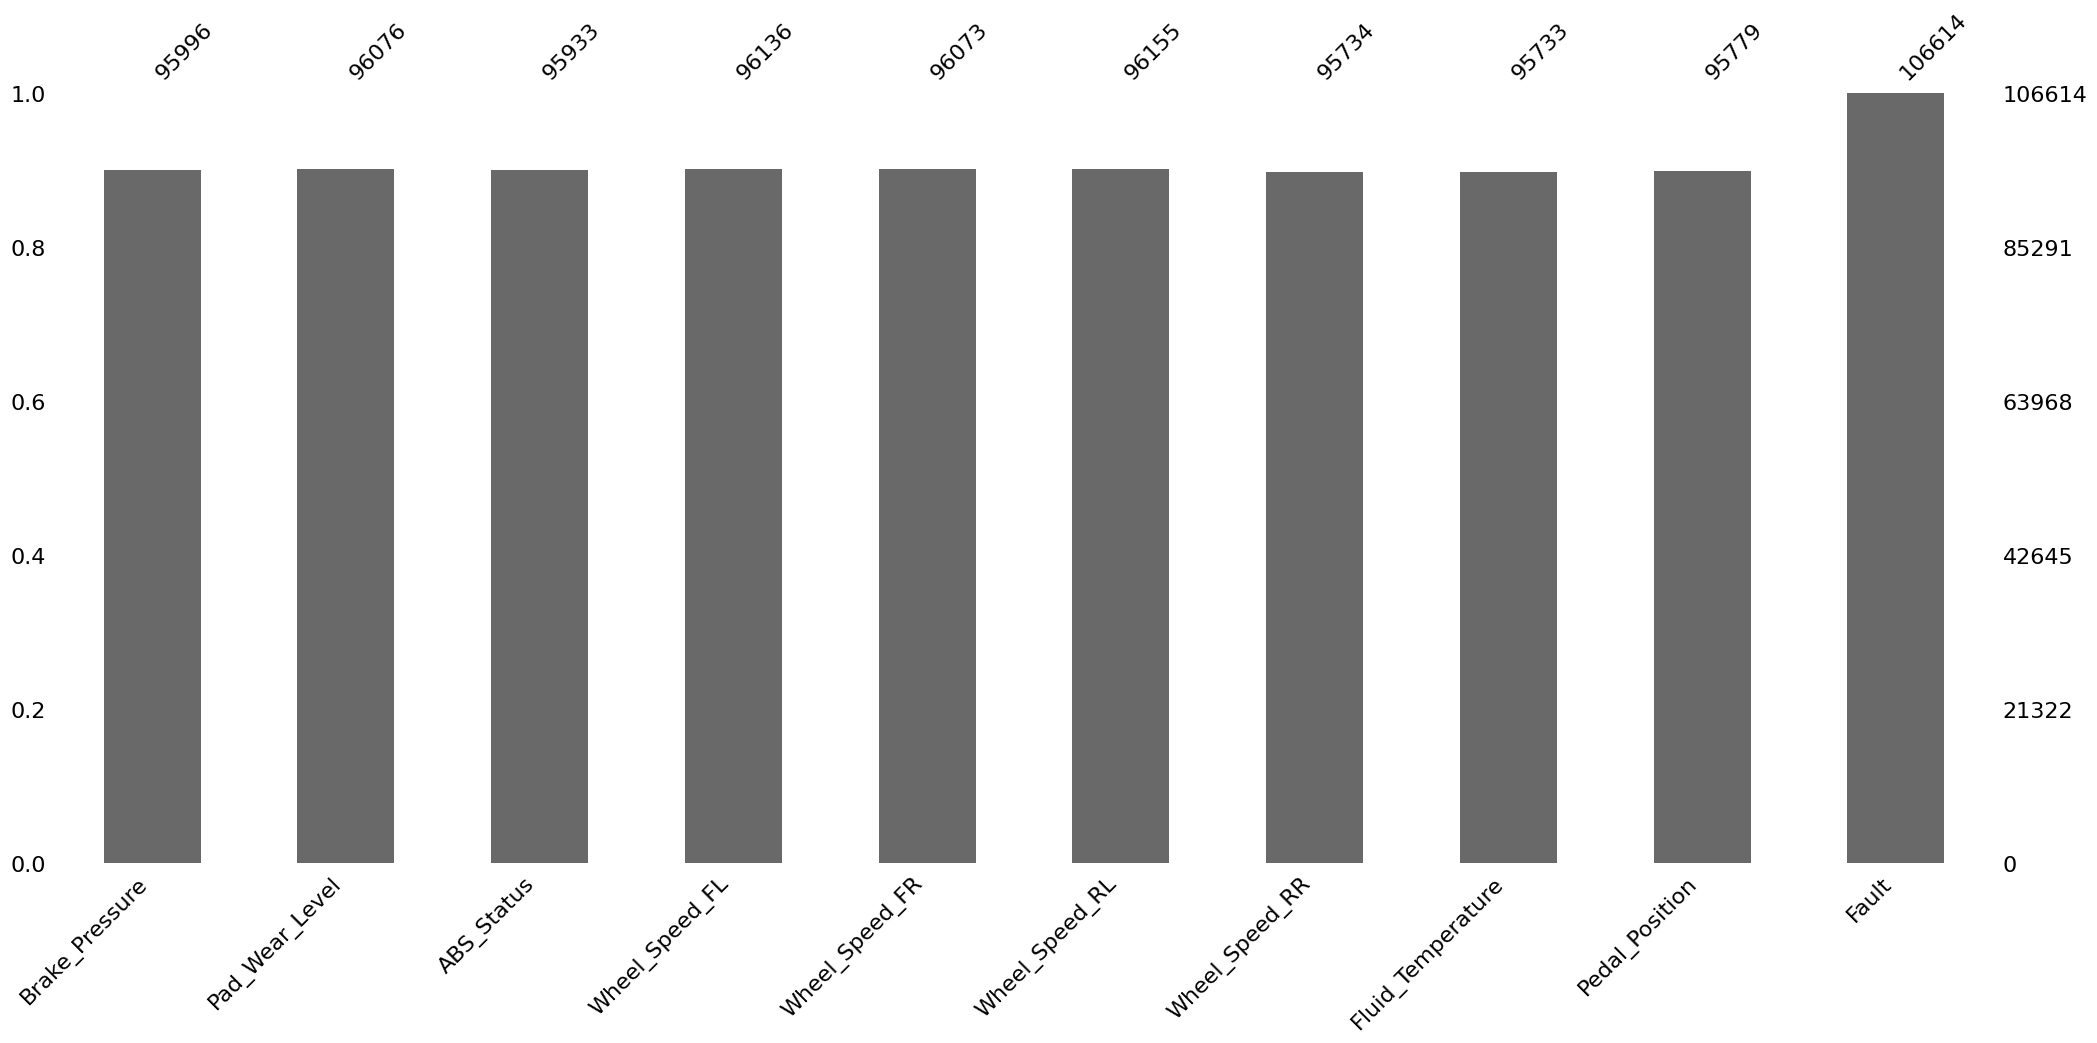

In [13]:
missingno.bar(df)

In [14]:
colms=["Brake_Pressure","Pad_Wear_Level","ABS_Status","Wheel_Speed_FL","Wheel_Speed_FR","Wheel_Speed_RL","Wheel_Speed_RR","Fluid_Temperature","Pedal_Position"]



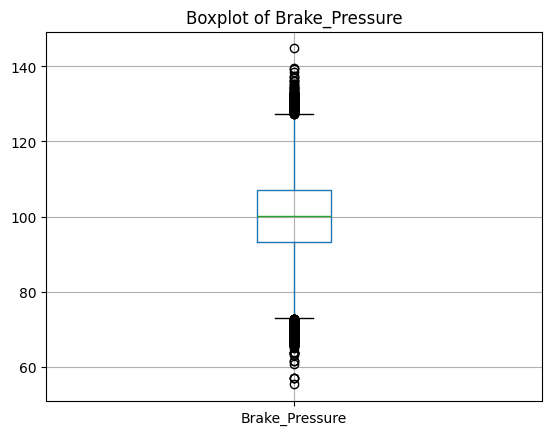

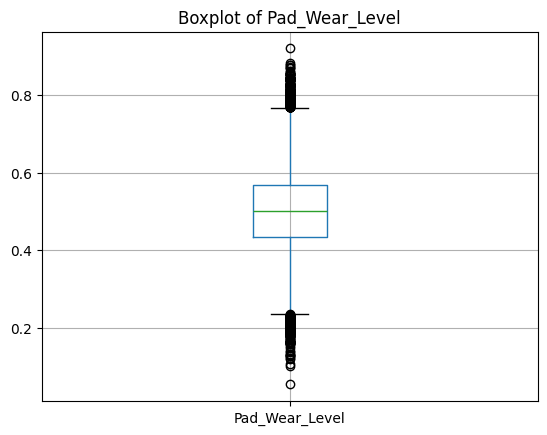

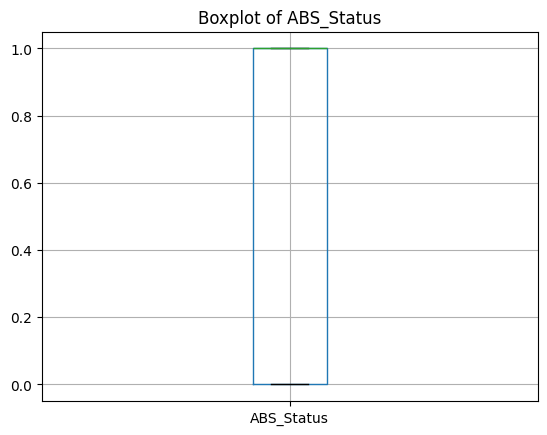

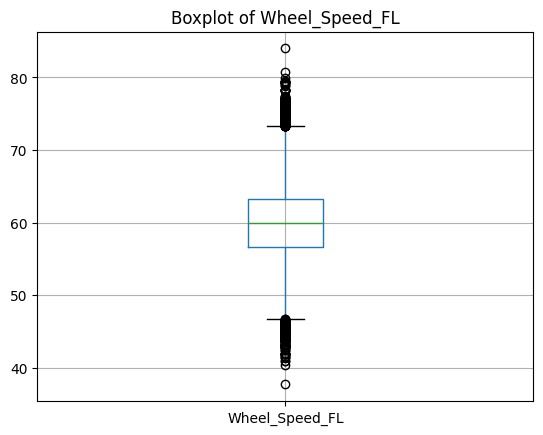

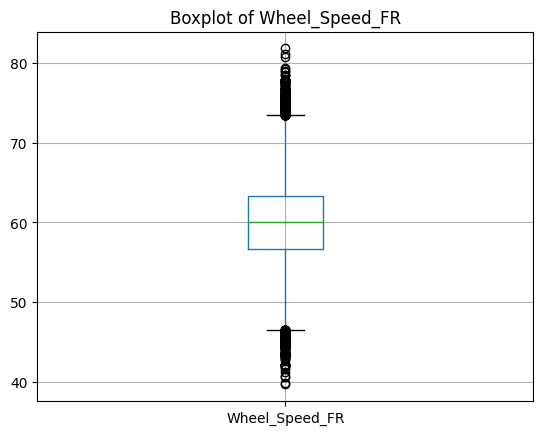

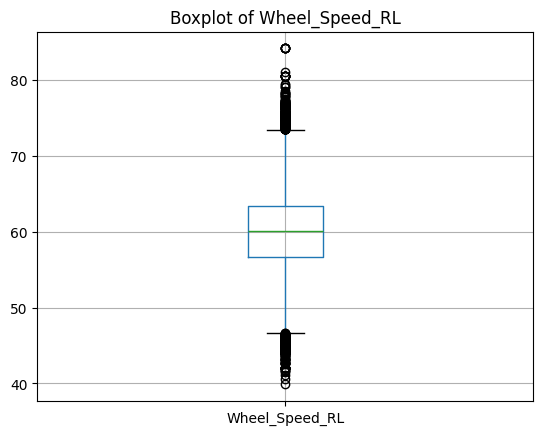

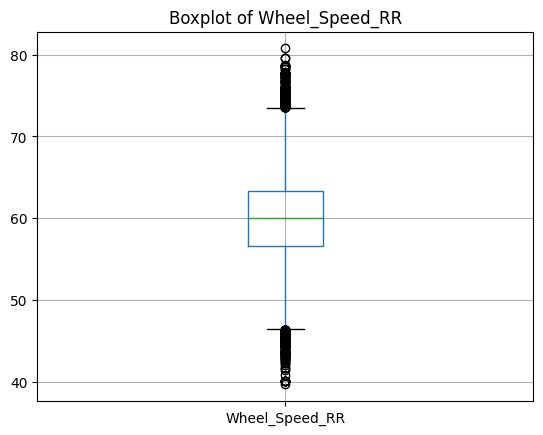

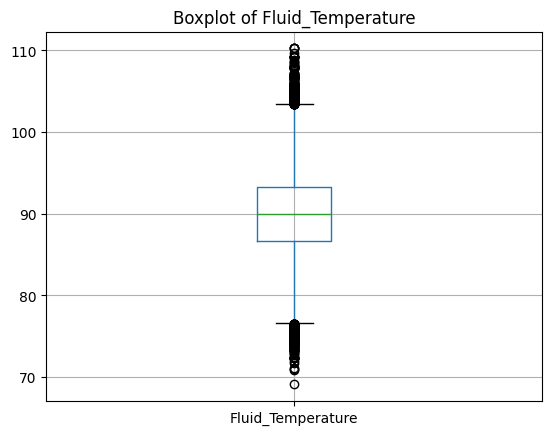

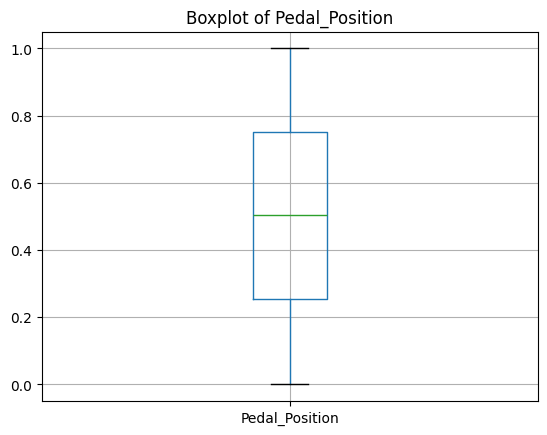

In [15]:
import matplotlib.pyplot as plt

for col in colms:
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [16]:
df.columns

Index(['Brake_Pressure', 'Pad_Wear_Level', 'ABS_Status', 'Wheel_Speed_FL',
       'Wheel_Speed_FR', 'Wheel_Speed_RL', 'Wheel_Speed_RR',
       'Fluid_Temperature', 'Pedal_Position', 'Fault'],
      dtype='object')

In [17]:
df["Brake_Pressure"] = df["Brake_Pressure"].fillna(df["Brake_Pressure"].mean())
df["Pad_Wear_Level"] = df["Pad_Wear_Level"].fillna(df["Pad_Wear_Level"].mean())
df["ABS_Status"] = df["ABS_Status"].fillna(df["ABS_Status"].mean())
df["Wheel_Speed_FL"] = df["Wheel_Speed_FL"].fillna(df["Wheel_Speed_FL"].mean())
df["Wheel_Speed_FR"] = df["Wheel_Speed_FR"].fillna(df["Wheel_Speed_FR"].mean())
df["Wheel_Speed_RL"] = df["Wheel_Speed_RL"].fillna(df["Wheel_Speed_RL"].mean())
df["Wheel_Speed_RR"] = df["Wheel_Speed_RR"].fillna(df["Wheel_Speed_RR"].mean())
df["Fluid_Temperature"] = df["Fluid_Temperature"].fillna(df["Fluid_Temperature"].mean())
df["Pedal_Position"] = df["Pedal_Position"].fillna(df["Pedal_Position"].mean())

In [18]:
df["Wheel_Speed_RR"].max()

df.isnull().sum()

Brake_Pressure       0
Pad_Wear_Level       0
ABS_Status           0
Wheel_Speed_FL       0
Wheel_Speed_FR       0
Wheel_Speed_RL       0
Wheel_Speed_RR       0
Fluid_Temperature    0
Pedal_Position       0
Fault                0
dtype: int64

In [19]:
df.isnull().sum()

Brake_Pressure       0
Pad_Wear_Level       0
ABS_Status           0
Wheel_Speed_FL       0
Wheel_Speed_FR       0
Wheel_Speed_RL       0
Wheel_Speed_RR       0
Fluid_Temperature    0
Pedal_Position       0
Fault                0
dtype: int64

In [20]:
df.duplicated().sum()

np.int64(43985)

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='Brake_Pressure', ylabel='Density'>

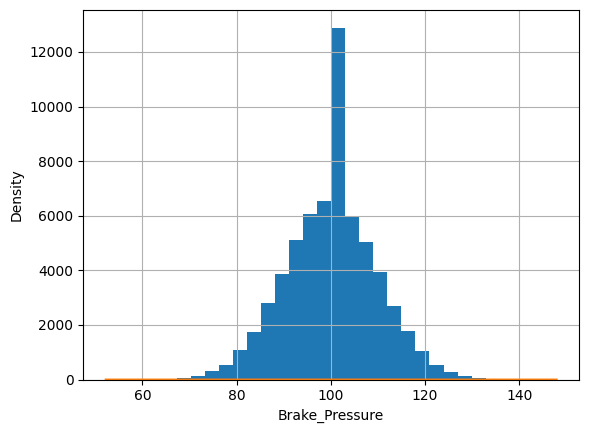

In [23]:
df['Brake_Pressure'].hist(bins=30)
sns.kdeplot(df['Brake_Pressure'])


<Axes: xlabel='ABS_Status', ylabel='count'>

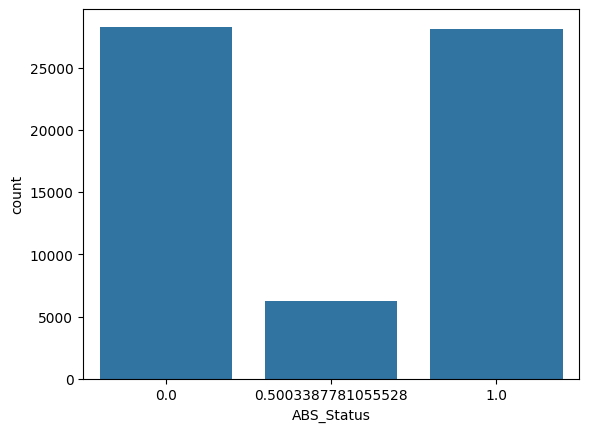

In [24]:
sns.countplot(x='ABS_Status', data=df)


<Axes: xlabel='Fault', ylabel='Brake_Pressure'>

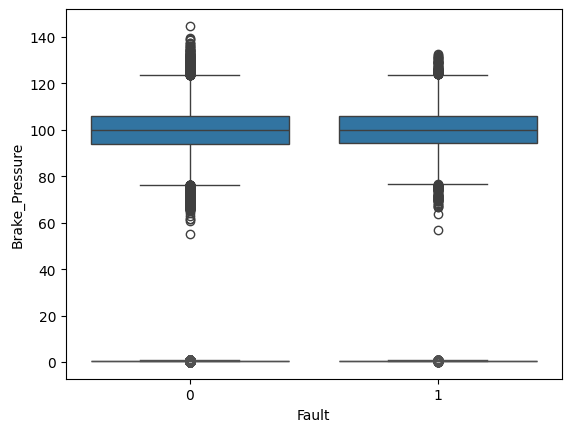

In [25]:
sns.boxplot(x='Fault', y='Brake_Pressure', data=df)
sns.boxplot(x='Fault', y='Pad_Wear_Level', data=df)


<Axes: xlabel='ABS_Status', ylabel='Fault'>

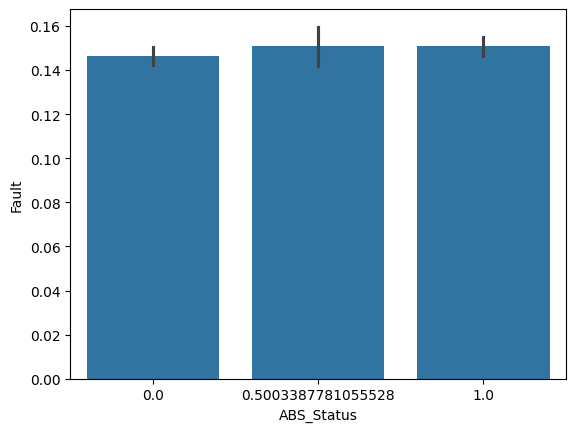

In [26]:
sns.barplot(x='ABS_Status', y='Fault', data=df)


<Axes: >

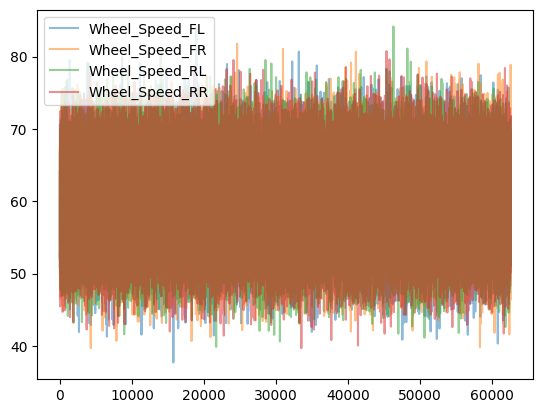

In [27]:
wheel_speeds = ['Wheel_Speed_FL', 'Wheel_Speed_FR', 'Wheel_Speed_RL', 'Wheel_Speed_RR']
df[wheel_speeds].plot(kind='line', alpha=0.5)


<Axes: >

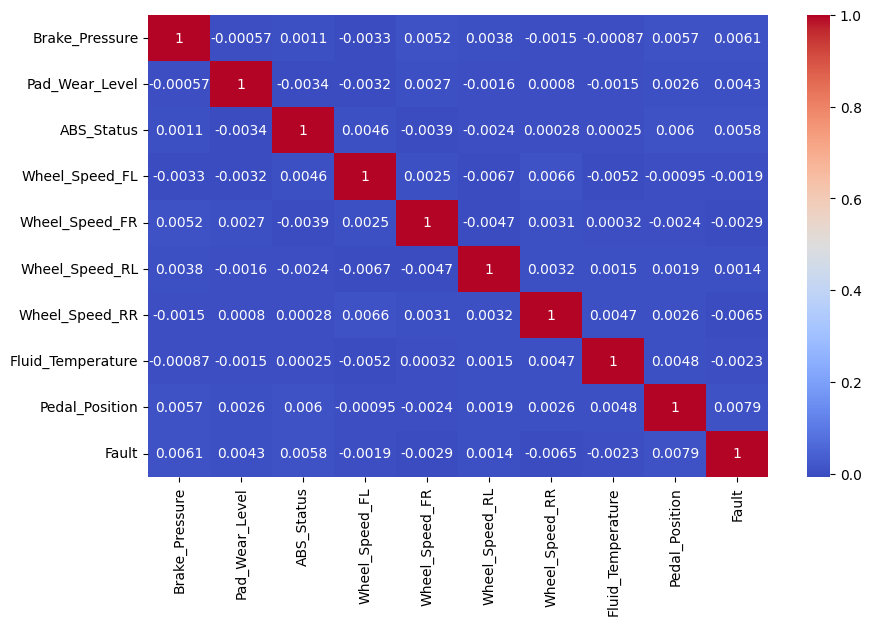

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [29]:
col = "ABS_Status"  
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
print(outliers)

Series([], Name: ABS_Status, dtype: float64)


In [30]:


df.columns

Index(['Brake_Pressure', 'Pad_Wear_Level', 'ABS_Status', 'Wheel_Speed_FL',
       'Wheel_Speed_FR', 'Wheel_Speed_RL', 'Wheel_Speed_RR',
       'Fluid_Temperature', 'Pedal_Position', 'Fault'],
      dtype='object')

In [31]:

from feature_engine.outliers import Winsorizer

numeric_cols = ["Brake_Pressure", "Pad_Wear_Level", "Wheel_Speed_FL",
                "Wheel_Speed_FR", "Wheel_Speed_RL", "Wheel_Speed_RR", "Fluid_Temperature"]

win = Winsorizer(
    capping_method='iqr',  
    tail='both',         
    variables=numeric_cols
)

df_winsorized = win.fit_transform(df)


In [32]:
print(df_winsorized[numeric_cols].describe())

       Brake_Pressure  Pad_Wear_Level  Wheel_Speed_FL  Wheel_Speed_FR  \
count    62629.000000    62629.000000    62629.000000    62629.000000   
mean       100.033271        0.500338       60.005372       59.996116   
std          9.355632        0.093136        4.651551        4.665418   
min         76.337863        0.266098       48.183513       48.253871   
25%         94.112952        0.441565       57.050642       57.064107   
50%        100.083089        0.500804       59.995953       59.981548   
75%        105.963011        0.558542       62.962061       62.937597   
max        123.738100        0.734008       71.829191       71.747833   

       Wheel_Speed_RL  Wheel_Speed_RR  Fluid_Temperature  
count    62629.000000    62629.000000       62629.000000  
mean        60.011658       59.996725          89.967370  
std          4.666777        4.690533           4.650498  
min         48.114397       48.153699          78.260139  
25%         57.028060       57.035978          

In [33]:
def check_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        print(f"{col}: {len(outliers)} outliers")

check_outliers_iqr(df_winsorized, numeric_cols)


Brake_Pressure: 0 outliers
Pad_Wear_Level: 0 outliers
Wheel_Speed_FL: 0 outliers
Wheel_Speed_FR: 0 outliers
Wheel_Speed_RL: 0 outliers
Wheel_Speed_RR: 0 outliers
Fluid_Temperature: 0 outliers


In [34]:
df

,Brake_Pressure,Pad_Wear_Level,ABS_Status,Wheel_Speed_FL,Wheel_Speed_FR,Wheel_Speed_RL,Wheel_Speed_RR,Fluid_Temperature,Pedal_Position,Fault
0,104.967142,0.658791,0.000000,60.243966,64.073339,64.173293,52.779920,89.945310,0.721824,0
1,98.617357,0.363352,0.000000,50.805666,62.510148,57.761404,52.207206,90.971220,0.520359,0
2,106.476885,0.400152,0.000000,54.526314,64.716102,60.688568,53.322908,89.698445,0.033706,1
3,115.230299,0.781691,1.000000,61.330578,56.177756,58.223006,59.644416,95.134251,0.311474,0
4,97.658466,0.603683,0.000000,59.995953,59.981548,56.646720,64.197682,94.734924,0.266101,0
...,...,...,...,...,...,...,...,...,...,...
62624,103.579240,0.593574,1.000000,64.113416,51.078601,56.721124,62.657686,91.665799,0.641589,1
62625,110.669710,0.679117,0.000000,65.723943,61.234084,63.234430,57.047823,87.941524,0.857053,1
62626,115.130966,0.563712,0.000000,59.864722,61.012391,66.658508,67.118830,85.242921,0.502555,0
62627,90.777819,0.760030,1.000000,63.502512,47.147196,66.222673,61.648972,92.597048,0.346314,0


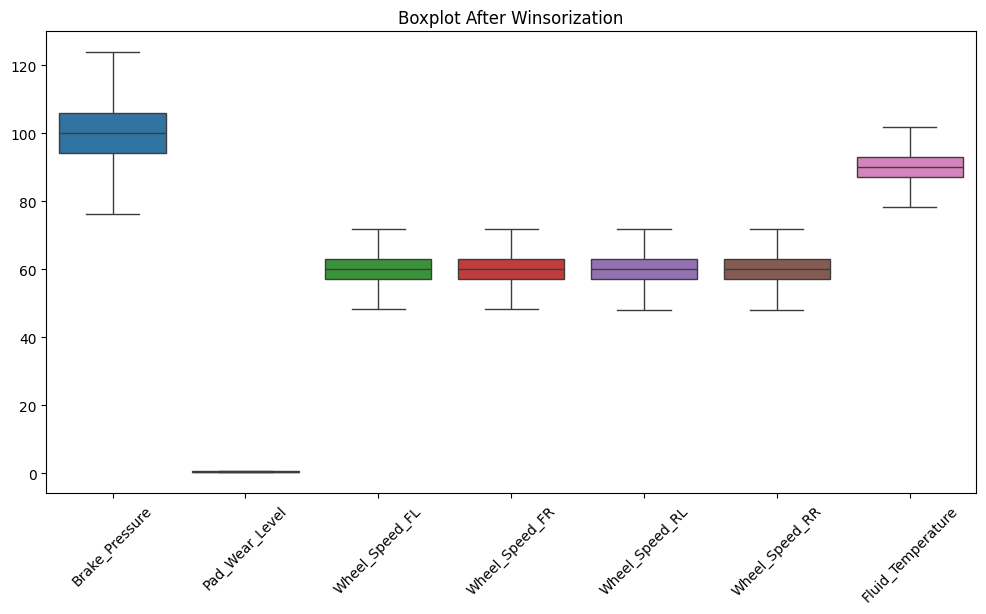

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_winsorized[numeric_cols])
plt.title("Boxplot After Winsorization")
plt.xticks(rotation=45)
plt.show()


In [36]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from collections import Counter

In [37]:
sm=SMOTE(random_state=29)

In [38]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
imputer = SimpleImputer(strategy='mean')
x_filled = imputer.fit_transform(x)
sm = SMOTE(random_state=29)
x_r, y_r = sm.fit_resample(x_filled, y)


In [39]:
Counter(y_r)

Counter({0: 53307, 1: 53307})

In [40]:
if isinstance(x, np.ndarray):
    x = pd.DataFrame(x, columns=[f"Feature_{i}" for i in range(x.shape[1])])

if isinstance(x_r, np.ndarray):
    x_r = pd.DataFrame(x_r, columns=x.columns)

if isinstance(y_r, np.ndarray):
    y_r = pd.Series(y_r)


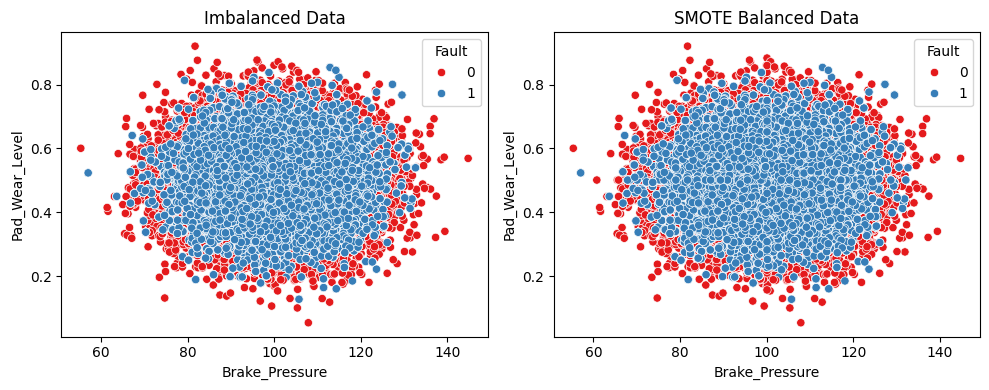

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Imbalanced Data")
sns.scatterplot(x=x.iloc[:, 0], y=x.iloc[:, 1], hue=y, palette="Set1")
plt.subplot(1, 2, 2)
plt.title("SMOTE Balanced Data")
sns.scatterplot(x=x_r.iloc[:, 0], y=x_r.iloc[:, 1], hue=y_r, palette="Set1")
plt.tight_layout()
plt.show()


In [42]:
x=df.drop("Fault",axis=1)
y=df["Fault"]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=29)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [46]:
x.isnull().sum()

Brake_Pressure       0
Pad_Wear_Level       0
ABS_Status           0
Wheel_Speed_FL       0
Wheel_Speed_FR       0
Wheel_Speed_RL       0
Wheel_Speed_RR       0
Fluid_Temperature    0
Pedal_Position       0
dtype: int64

In [47]:
from sklearn .linear_model import LogisticRegression
from mlxtend.plotting import plot_learning_curves
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred=log.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,y_pred))

accuracy_score: 0.8500718505508542


C:\Users\91879\anaconda3\envs\sowmith\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\91879\anaconda3\envs\sowmith\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91879\anaconda3\envs\sowmith\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

([0.8502994011976048,
  0.8484031936127745,
  0.8500332667997339,
  0.850306870914625,
  0.8505448884276077,
  0.8510029606466851,
  0.8507641423357665,
  0.850706052592186,
  0.8511265856471214,
  0.851426062311638],
 [0.8500718505508542,
  0.8500718505508542,
  0.8500718505508542,
  0.8500718505508542,
  0.8500718505508542,
  0.8500718505508542,
  0.8500718505508542,
  0.8500718505508542,
  0.8500718505508542,
  0.8500718505508542])

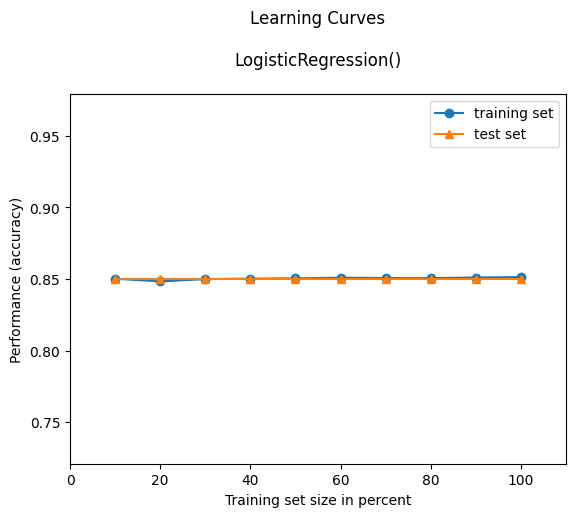

In [48]:
plot_learning_curves(
    x_train,
    y_train,
    x_test,
    y_test,log,scoring='accuracy') 

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [50]:

### KNN algorithm 
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,y_pred))

accuracy_score: 0.8111927191441801


In [51]:
knn = KNeighborsClassifier(n_neighbors=3,weights="distance",p=2,algorithm="kd_tree")
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,y_pred))

accuracy_score: 0.8102347117994572


In [52]:
from mlxtend.plotting import plot_learning_curves

([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.807201021874501,
  0.8098355420724892,
  0.8066421842567459,
  0.8059236787482037,
  0.8077598594922561,
  0.8072808558198946,
  0.807201021874501,
  0.8071211879291075,
  0.8091968705093405,
  0.8102347117994572])

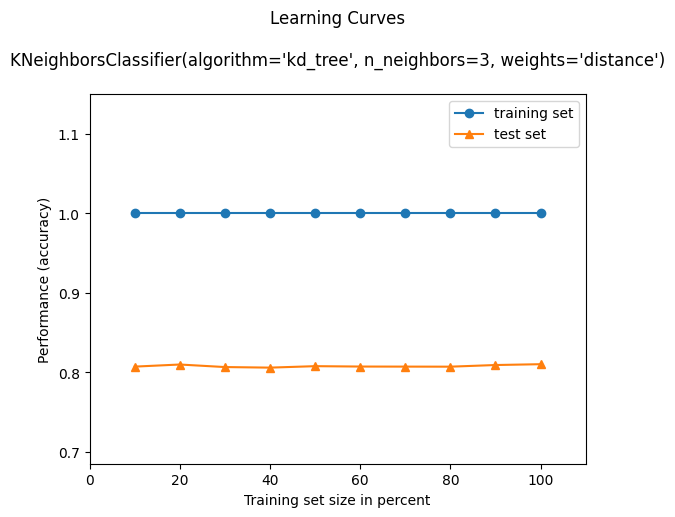

In [53]:
plot_learning_curves(x_train,
    y_train,
    x_test,
    y_test,knn,scoring='accuracy')

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print("accuracy_score:",accuracy_score(y_test,y_pred))

accuracy_score: 0.7378253233274789


([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.7391825003991698,
  0.7260897333546223,
  0.7284847517164298,
  0.7335941242216191,
  0.7306402682420565,
  0.732636116876896,
  0.7382244930544467,
  0.7341529618393741,
  0.7328756187130768,
  0.7358294746926393])

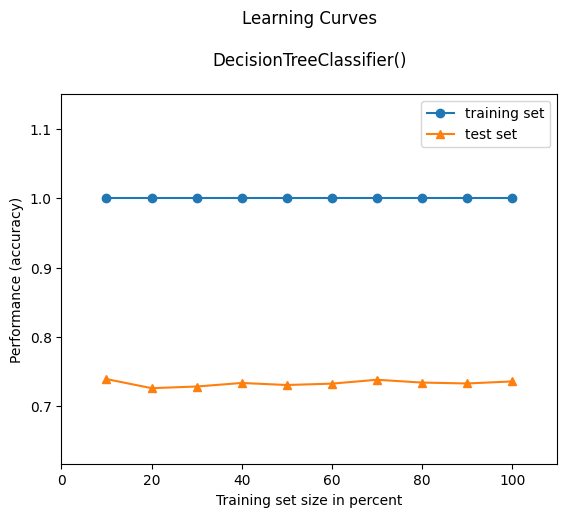

In [55]:
plot_learning_curves(x_train,
    y_train,
    x_test,
    y_test,dt,scoring='accuracy')

In [56]:
import warnings
warnings.filterwarnings("ignore")

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84     10648
           1       0.16      0.18      0.17      1878

    accuracy                           0.74     12526
   macro avg       0.51      0.51      0.51     12526
weighted avg       0.75      0.74      0.74     12526



In [58]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(log, x, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.85118953 0.85118953 0.85110969 0.85110969 0.85117764]
Mean accuracy: 0.8511552159930498


In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [60]:
df.columns

Index(['Brake_Pressure', 'Pad_Wear_Level', 'ABS_Status', 'Wheel_Speed_FL',
       'Wheel_Speed_FR', 'Wheel_Speed_RL', 'Wheel_Speed_RR',
       'Fluid_Temperature', 'Pedal_Position', 'Fault'],
      dtype='object')

In [61]:
x = pd.DataFrame({
    'Brake_Pressure': [55555], 
    'Pad_Wear_Level': [8955],
    'ABS_Status': [1],
    'Wheel_Speed_FL': [56888],
    'Wheel_Speed_FR': [785],
    'Wheel_Speed_RL': [5682],
    'Wheel_Speed_RR': [231.5],
    'Fluid_Temperature': [158.02],
    'Pedal_Position': [780.21]
})

diet_rec = log.predict(x)
diet_rec

array([1])

In [62]:
'Brake_Pressure', 'Pad_Wear_Level', 'ABS_Status', 'Wheel_Speed_FL',
       'Wheel_Speed_FR', 'Wheel_Speed_RL', 'Wheel_Speed_RR',
       'Fluid_Temperature', 'Pedal_Position', 'Fault'],

IndentationError: unexpected indent (3429671326.py, line 2)

In [ ]:
df

In [ ]:
log = LogisticRegression()
log.fit(x,y)

In [ ]:
# New test datapoint
x_new = pd.DataFrame({
    'Brake_Pressure':  [104.967142],
    'Pad_Wear_Level':  [0.658791],
    'ABS_Status':      [0.000000],
    'Wheel_Speed_FL':  [60.243966],
    'Wheel_Speed_FR':  [64.073339],
    'Wheel_Speed_RL':  [64.173293],
    'Wheel_Speed_RR':  [52.779920],
    'Fluid_Temperature':[89.945310],
    'Pedal_Position':  [0.721824]
})

x_new = x_new[x_train.columns]

x_new_scaled = scaler.transform(x_new)

y_pred = log.predict(x_new_scaled)

print(f"Predicted class: {y_pred[0]}")


In [ ]:
df

In [ ]:
import pickle

In [ ]:
#with open(r"C:\Users\91879\Downloads\model.pkl","wb") as file:
    pickle.dump(lr,file)  ## saving the file

In [ ]:
#with open(r"C:\Users\91879\Downloads\model.pkl","rb") as fil.e:
    model=pickle.load(file)

In [ ]:
#model.predict([[SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt]])

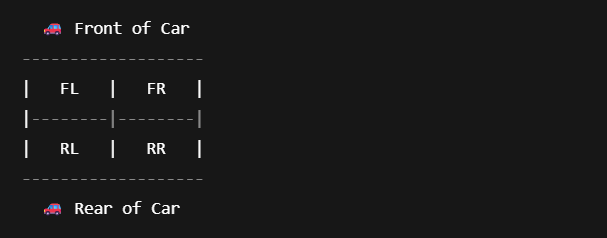

In [ ]:
#import optuna
from sklearn.model_selection import cross_validate

In [ ]:
#def objective(trails):
  k_value = trails.suggest_int("k_value", 1,5)
  p_value = trails.suggest_int("p_value", 1,3)
  weights = trails.suggest_categorical("weights", ["uniform", "distance"])
  algo = trails.suggest_categorical("algorithm", ["ball_tree", "kd_tree"])
  knn = KNeighborsClassifier(n_neighbors=k_value, p=p_value, weights=weights, algorithm=algo)
  result = cross_validate(estimator=knn, X=x_train, y=y_train, cv=2, scoring="accuracy")["test_score"].mean()
  return result